In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Closed_deals

In [2]:
# carga del dataset y muestreo de 10 registros aleatorios
Closed_deals = pd.read_csv('Datasets_original/olist_closed_deals_dataset.csv')
Closed_deals.sample(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
231,8928ccba6d94d5f1481c1065330c6066,dd22fbe4df5d84be25176054640b696d,f42a2bd194f7802ab052a815c8de65b7,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-11 12:36:11,food_drink,industry,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
665,2dfbe1c802c78a8b1f75ef13b70c1124,382229d1e840115ffe3dbf5ff460e417,4b339f9567d060bcea4f5136b9f5949e,495d4e95a8cf8bbf8b432b612a2aa328,2018-03-27 19:15:09,household_utilities,online_big,shark,NaN,NaN,NaN,reseller,NaN,0.0
576,bc419ad99b06b6b3e155039d714e2061,54583ab379489add547fe47b628db589,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-30 16:07:26,baby,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
321,4c898465f7e0becf53dd933ab2a1b6f9,08083b94b3c7e0847502a026125dbfbd,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-06-04 18:53:50,construction_tools_house_garden,online_top,cat,NaN,NaN,NaN,reseller,NaN,0.0
526,f5772c97a8e2bcf909674d8701480d55,63c6951772f3f4fc4e40ffd24207fd19,4b339f9567d060bcea4f5136b9f5949e,060c0a26f19f4d66b42e0d8796688490,2018-03-09 13:45:50,phone_mobile,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
670,9e5523333afdebe2911f20c3e5b452df,698f5fa55a5f73d0740e9d9a773e8093,9e4d1098a3b0f5da39b0bc48f9876645,495d4e95a8cf8bbf8b432b612a2aa328,2018-03-15 20:31:54,health_beauty,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
430,f9cb3124b5a22b133f21273ef2cb0695,9e3f08af3b6caa76962b05087eed5425,09285259593c61296eef10c734121d5b,fbf4aef3f6915dc0c3c97d6812522f6a,2018-04-16 16:58:06,construction_tools_house_garden,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0
806,5a85461739094491a96bb30267640454,1cd757f0f38c0847a2f05717d18b8d92,9d12ef1a7eca3ec58c545c678af7869c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-18 12:38:36,computers,industry,cat,NaN,NaN,NaN,reseller,NaN,0.0
402,3ce39e5e8a82aa26e73fb52221089d5e,59055625da956ae84296c08491141984,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-04-30 19:28:30,construction_tools_house_garden,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
143,48a8b46e7ea342b913b50c7087f78162,56e361f411e38dcef17cdc2a3d99628b,9d12ef1a7eca3ec58c545c678af7869c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-10 19:16:27,audio_video_electronics,industry,cat,NaN,NaN,NaN,manufacturer,NaN,0.0


In [3]:
# tamaño del dataset
Closed_deals.shape

(842, 14)

In [4]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [5]:
# descripcion de las columnas numéricas
Closed_deals.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [6]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariciones
Closed_deals.describe(include=['O'])

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type
count,842,842,842,842,842,841,836,665,63,64,66,832
unique,842,842,32,22,824,33,8,9,2,2,6,3
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller
freq,1,1,140,133,6,105,332,407,58,54,22,587


In [7]:
# cuantos datos nulos por columna se encuentran
Closed_deals.isna().sum()*100/Closed_deals.shape[0]

mql_id                            0.000000
seller_id                         0.000000
sdr_id                            0.000000
sr_id                             0.000000
won_date                          0.000000
business_segment                  0.118765
lead_type                         0.712589
lead_behaviour_profile           21.021378
has_company                      92.517815
has_gtin                         92.399050
average_stock                    92.161520
business_type                     1.187648
declared_product_catalog_size    91.805226
declared_monthly_revenue          0.000000
dtype: float64

- De un total de 842 registros las columnas has_company, has_gtin, average_stock y declared_product_catalog_size tiene mas del 90 % de sus datos faltantes
- Esta tabla no aporta datos muy relevantes

## Customers

In [8]:
# carga del dataset y muestreo de 10 registros aleatorios
Customers = pd.read_csv('Datasets_original/olist_customers_dataset.csv')
Customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
31705,108b9f81ac5b441daf5927b6f402951b,ec89bfe816b83adb0613e1ac25b41df9,13043,campinas,SP
42150,4e88ed6941cca32d4a64d7ebaab3d2ed,cda5477430c1c4b19bc0fd8f55b866c0,66630,belem,PA
59600,4e58705c154cc734bd02c659f9079e16,7bcbce4f3beaeabbb1207934260de958,3928,sao paulo,SP
18873,5645f6b97d3740bc2846f27af1fe973f,034e7f551239546ae63e45d0b1186ab1,6767,taboao da serra,SP
7848,a4788192f4152e96cc73fcc1df791f21,7fe9dc21448d5fa5a0629aefef9a2375,20973,rio de janeiro,RJ
28607,b7f58105406451f1b16a368b61cf1ecb,092d1ba154276416f027e086b5de9fc2,24452,sao goncalo,RJ
17379,6003af27083b57f0eaadcdbc42e69166,a708496b0d4cec6f6ce374fd7eae540b,11680,ubatuba,SP
88030,6d036be2310d04cd23d731538e7379df,920df3435f8c6487bd257a04369c09be,31748,belo horizonte,MG
5921,3c35d9abe15b076da3a85adaa215ce6d,c82151fb9ec85aed79c8484786e36df1,71020,brasilia,DF
41796,725996336a7ab4fd518c0be1493fee5e,ccedd01ebe7a8641887f6676ba5ae095,4346,sao paulo,SP


In [9]:
# tamaño del dataset
Customers.shape

(99441, 5)

In [10]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
# descripcion de las columnas numéricas 
Customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Customers.describe(include=['O'])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


- Analizando Customers faltan datos de customers_unique_id que no hay referencia de como fueron creados esos codigos
- Esta tabla se puede utilizar para saber de qué ciudades provienen los consumos

## Geolocation

In [13]:
# carga del dataset y muestreo de 10 registros aleatorios
Geolocation = pd.read_csv('Datasets_original/olist_geolocation_dataset.csv')
Geolocation.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
956480,93290,-29.862944,-51.141911,esteio,RS
385277,18133,-23.518538,-47.133807,sao roque,SP
459141,22710,-22.945804,-43.380800,rio de janeiro,RJ
506751,27525,-22.479120,-44.499226,resende,RJ
195466,8051,-23.509698,-46.468261,são paulo,SP
322089,13845,-22.354612,-46.954339,mogi guacu,SP
396046,18800,-23.198596,-49.382064,piraju,SP
398586,19060,-22.116508,-51.407419,presidente prudente,SP
432373,21620,-22.862155,-43.426610,rio de janeiro,RJ
958366,93700,-29.680107,-51.060259,campo bom,RS


In [14]:
# tamaño del dataset
Geolocation.shape

(1000163, 5)

In [15]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# descripcion de las columnas numéricas
Geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [17]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Geolocation.describe(include=['O'])

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


- Esta tabla puede servir para ubicar las ciudades correctamente en objeto mapa del Dashboard.

## Marketing

In [18]:
# carga del dataset y muestreo de 10 registros aleatorios
Marketing = pd.read_csv('Datasets_original/olist_marketing_qualified_leads_dataset.csv')
Marketing.sample(10)

,mql_id,first_contact_date,landing_page_id,origin
4421,f9009793d98fb864b2067957cebb8250,2017-11-17,f98c2bd96ac4a5d9476734e790c91384,unknown
6251,6a539b31d65a801da9851d71f286d69a,2017-11-01,1722481ac9e5371e5099dea226b5421d,paid_search
7639,735b35808f01b379a564129d77847dfb,2018-01-11,88740e65d5d6b056e0cda098e1ea6313,social
47,fe629597eb47defc9ff1e96bbd47277c,2018-04-05,22c29808c4f815213303f8933030604c,direct_traffic
5894,5b2aad03528f0d771e8332451010d045,2018-03-18,c35447dcd1a50b2e2ee3184be602b597,social
1234,1e0c883de22f484fe68d3e575e15fe27,2018-03-27,ce1a65abd0973638f1c887a6efcfa82d,organic_search
788,b66974d1cb6b6a61dc2d659ff795410d,2017-11-23,b76ef37428e6799c421989521c0e5077,organic_search
17,be8f254ef25c5a40ac8b395ed4fc6033,2018-01-13,1d4ddc25ccaa2adeded340b6eda66182,organic_search
6598,6ff169c8d96bc9b776c14c0e65af28df,2018-04-17,22c29808c4f815213303f8933030604c,organic_search
22,29860f5735fc4987b5f8ef3ee2767847,2018-03-12,a7982125ff7aa3b2054c6e44f9d28522,unknown


In [19]:
# tamaño del dataset
Marketing.shape

(8000, 4)

In [20]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [21]:
# descripcion de las columnas numéricas
Marketing.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [22]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Marketing.describe(include=['O'])

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [23]:
# cuantos datos nulos por columna se encuentran
Marketing.isna().sum()*100/Marketing.shape[0]

mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
origin                0.75
dtype: float64

- Esta tabla no aporta datos significativos para el análisis que queremos realizar

## Order_items

In [24]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_items = pd.read_csv('Datasets_original/olist_order_items_dataset.csv')
Order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
62474,8eb2d535942b5b5c20192ab8a72db202,1,633cb41f42ef3dcfc01174d27637d0ad,ef506c96320abeedfb894c34db06f478,2018-07-16 15:07:15,19.99,7.40
42000,5fa4923e35eb4c0d471dc44378b1215c,1,764292b2b0f73f77a0272be03fdd45f3,bd23da7354813347129d751591d1a6e2,2018-01-17 02:48:46,99.90,11.90
33548,4bfddd9392014699ab2cbae22a27a574,1,fd68051e3deccde23af3d77152129c5a,6a51fc556dab5f766ced6fbc860bc613,2018-01-29 11:50:47,163.69,15.90
73091,a69d0f3cfd16e940ead155695b5fb184,1,7d19da97298dfc1d2e254146559095f3,c0e6839516f5398edc34adf5f1d53d1a,2017-08-18 17:55:15,199.00,36.90
40334,5bd4ea94edd60fb87f226330b569b2c8,1,3ce21e38e6a3060c20f4e74bdab770c8,1b938a7ec6ac5061a66a3766e0e75f90,2018-03-12 02:10:55,64.90,25.29
95264,d8148e06f2f2b366a0c8df064103223b,1,e30a07181e238b29af319577b9bb22fe,d566c37fa119d5e66c4e9052e83ee4ea,2018-04-30 04:31:25,56.90,19.37
96575,db28a85f64c84ecf4ef58cddcaa1cf50,2,dd4c3b4ab7e001aaf385ea2e68952030,d673a59aac7a70d8b01e6902bf090a11,2018-02-27 17:05:41,29.90,11.85
56036,7f71c35ab1193f2ad44d9359a7a0f1ff,1,e389381479408ccdcdd406d8d3049e45,b561927807645834b59ef0d16ba55a24,2018-05-29 19:57:36,29.30,8.88
44016,640aef9709beda161ca0b5af58ac437c,1,abba22ec8f8647474e51e996d74da8e7,54aa8463e87776b5612f4bdc4bd5d4de,2016-10-15 05:03:14,269.90,16.65
92299,d16f9a68b1aa5e1e872a86a474930835,1,61787f92f08a18258c0267e53cb9c1cb,42fb44130ac3134cde8e35cf8ec7df25,2017-02-10 10:12:38,18.90,10.96


In [25]:
# tamaño del dataset
Order_items.shape

(112650, 7)

In [26]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
# descripcion de las columnas numéricas
Order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [28]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_items.describe(include=['O'])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [29]:
# Revisión de la columna order_item_id; expresa la cantidad incremental de artículos presentes en una misma orden
Order_items[['order_id', 'order_item_id']].groupby(['order_id']).count().sort_values('order_item_id', ascending=False)

,order_item_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [30]:
# Revisión de la columna product_id; cuál es el producto más vendido
Order_items[['order_id','product_id']].groupby(['product_id']).count().sort_values('order_id', ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [31]:
# Revisión de la columna product_id; cuánto facturó el producto más vendido
Order_items[['price','product_id']].groupby(['product_id']).sum().sort_values('price', ascending=False)

,price
product_id,
bb50f2e236e5eea0100680137654686c,63885.00
6cdd53843498f92890544667809f1595,54730.20
d6160fb7873f184099d9bc95e30376af,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
99a4788cb24856965c36a24e339b6058,43025.56
...,...
2e8316b31db34314f393806fd7b6e185,2.99
680cc8535be7cc69544238c1d6a83fe8,2.90
8a3254bee785a526d548a81a9bc3c9be,2.55


In [32]:
# Revisión de la columna seller_id; cuál es el vendedor con más órdenes
Order_items[['order_id','seller_id']].groupby(['seller_id']).count().sort_values('order_id', ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [33]:
# Revisión de la columna seller_id; cuánto sumaron las órdenes de cada vendedor
Order_items[['price','seller_id']].groupby(['seller_id']).sum().sort_values('price', ascending=False)

,price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
53243585a1d6dc2643021fd1853d8905,222776.05
4a3ca9315b744ce9f8e9374361493884,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,194042.03
7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


## Order_payments

In [34]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_payments = pd.read_csv('Datasets_original/olist_order_payments_dataset.csv');

In [35]:
Order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
30031,521bbed0033539e0f0a361abacccc71e,1,credit_card,7,234.46
21346,d7afb34a55fee792585830fc0509d1fe,1,credit_card,1,24.69
30476,d209a096437820f2ae09fdb0e5637474,1,credit_card,4,621.76
36121,a6d934d331efb68761bccb25bc87d170,1,credit_card,7,165.67
29862,737ecd48032c3cedf3facac4baf28bf3,1,credit_card,1,64.50
97934,f71cb2e4886fd0074284be2c8cc9b144,1,boleto,1,95.02
61213,a3266d5717615919b50f2d1f62d8c0a8,1,credit_card,1,62.15
28691,de0bf4e0a4d6dd65281279bfbbb815c9,1,credit_card,1,97.86
50229,acade99edef372cfc2cf2f1fe6cd4d21,1,credit_card,2,134.89
82873,3710f61b45bb40db596e352722b6937e,1,credit_card,8,1603.25


In [36]:
# tamaño del dataset
Order_payments.shape

(103886, 5)

In [37]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
# descripcion de las columnas numéricas
Order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [39]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_payments.describe(include=['O'])

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


- El comportamiento de los pagos. La utilidad dependerá de la propuesta del PO

## Order_reviews

In [40]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_reviews = pd.read_csv('Datasets_original/olist_order_reviews_dataset.csv')
Order_reviews.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
53174,28333cd5149ee07d4d31cdcd5b1f447b,6c0819b0edde57ca00841c3d2092bb34,4,Satisfeito,Produto chegou rápido e em perfeito estado. Ob...,2018-07-29 00:00:00,2018-07-31 17:08:59
48016,0b4d7ef7d0a277f4839a6b6c59e8d9ad,acd5c180c2d3c364bd63013b33063120,5,NaN,Jóia. Prazo entrega. Material. Wish.,2018-02-24 00:00:00,2018-02-25 09:31:06
98684,4062bf62063232a0aca05f5b3ce59146,ea0ea2ab3f42182e8f428012daf9834b,5,NaN,NaN,2018-06-20 00:00:00,2018-06-22 11:50:32
99077,f4a98f33253d4fd56cbcee090bfa5e89,f6e09765a386aa4607ea665f090511ae,5,NaN,NaN,2017-12-09 00:00:00,2017-12-09 15:54:39
72720,889b5d2c1a074d45537dd74f0ee25e96,3cfcc0ca272d41bdfa5d2ec747019f73,5,NaN,satisfeito,2018-04-13 00:00:00,2018-04-16 12:21:06
42867,b7d064459c47173041daa56e1498402b,b79fb6b886fae55768f7f0973571329a,5,NaN,NaN,2017-05-04 00:00:00,2017-05-06 01:22:49
33350,9c4ce888a4317d4dab21e9e5cf172764,d1d889b705a1d015ae3040fe1cb24be7,5,recomendo,NaN,2018-07-13 00:00:00,2018-07-14 01:56:05
39942,0d1a5509780307230f58b7ccdafce263,b230cdf7f5d8115711cbab88f4636406,5,Super Recomendo,Chegou muito antes do prazo e tudo certinho.,2018-06-03 00:00:00,2018-06-04 13:10:12
39326,6116d3fa41da9c40104c4c1f52d32358,fa666f44d0e5c50dad23a1bc4a8c2a50,4,NaN,NaN,2017-10-10 00:00:00,2017-10-10 15:33:08
22372,4caa905f18affe95ca7d00e5acc746f2,846245fd0ae27dba2f13054c098feb97,5,NaN,NaN,2017-12-01 00:00:00,2017-12-04 23:55:31


In [41]:
# tamaño del dataset
Order_reviews.shape

(99224, 7)

In [42]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [43]:
# descripcion de las columnas numéricas
Order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [44]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_reviews.describe(include=['O'])

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


In [45]:
# cuantos datos nulos por columna se encuentran
Order_reviews.isna().sum()*100/Order_reviews.shape[0]

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

- La utilidad de esta tabla dependerá del objetivo propuesto.

## Orders

In [46]:
# carga del dataset y muestreo de 10 registros aleatorios
Orders = pd.read_csv('Datasets_original/olist_orders_dataset.csv')
Orders.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20522,1469262ec8414d0e3f821bda79cf14cc,b53f2d80af3f43f230402209960c81e6,canceled,2018-07-16 11:27:29,2018-07-18 03:31:06,NaN,NaN,2018-08-07 00:00:00
95005,d2b465d6828555de4d5226daea422618,3dfc6e89a7989cc23be6f2db44ca2471,delivered,2017-02-22 06:47:45,2017-02-22 09:35:08,2017-02-22 12:18:54,2017-03-23 08:52:13,2017-04-25 00:00:00
764,d118d545516947d2d82fda28e9d631af,8918dedf08a051aff27479246e74a5bd,delivered,2017-08-02 13:18:30,2017-08-02 13:30:13,2017-08-09 14:00:41,2017-08-11 14:40:06,2017-08-22 00:00:00
3023,df972aca1fba0a417674857678e2c4bb,322eae54daccdcbee96799ebd3a67830,delivered,2018-05-21 11:39:30,2018-05-21 15:32:00,2018-05-24 10:48:00,2018-06-02 15:28:45,2018-06-07 00:00:00
37588,5f9b8704ad096052823d6e006cf03443,9435f264913e96d69160e6f90380c851,delivered,2017-08-16 04:14:00,2017-08-17 04:10:06,2017-08-21 11:57:30,2017-08-24 16:03:31,2017-08-30 00:00:00
62610,feb6795b3a5f345c10e8e4a7c6383130,22dc6c288a0404fc96f83cab39a4e734,delivered,2018-08-10 19:29:13,2018-08-10 19:44:33,2018-08-15 13:37:00,2018-08-21 13:33:06,2018-09-03 00:00:00
85864,fcbfb4bc844bc55598f7c04fb2b7c294,e10f6446a2847466d0b1c76265210a38,delivered,2017-11-23 14:24:05,2017-11-23 14:31:26,2017-11-27 18:38:21,2017-12-04 19:57:11,2017-12-13 00:00:00
32454,28d2a5cfa6ad3fed5f73c66dca690d22,1a569f84f0d009ad5ffe957ac8471572,delivered,2018-06-08 13:56:46,2018-06-08 14:47:18,2018-06-12 10:09:00,2018-06-23 00:51:19,2018-06-29 00:00:00
90529,c89917453d2eed2cf55323bafe4bb091,65952c83b682892cce0f55fffe3240c0,delivered,2018-01-23 13:45:29,2018-01-24 07:12:34,2018-01-25 21:12:42,2018-01-30 12:49:09,2018-02-19 00:00:00
3281,3056cd8b96b8ff6badf1b936a8cb3bc8,07ebdcd609056322ab696bca753690ee,delivered,2018-03-01 23:08:25,2018-03-01 23:29:37,2018-03-02 17:09:42,2018-03-07 20:52:56,2018-03-26 00:00:00


In [47]:
# tamaño del dataset
Orders.shape

(99441, 8)

In [48]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
# descripcion de las columnas numéricas
Orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [50]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Orders.describe(include=['O'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [51]:
# cuantos datos nulos por columna se encuentran
Orders.isna().sum()*100/Orders.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

- La utilidad de esta tabla dependerá del objetivo.

## Products

In [52]:
# carga del dataset y muestreo de 10 registros aleatorios
Products = pd.read_csv('Datasets_original/olist_products_dataset.csv')
Products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8522,892198c42c50014fa460d71bed876d7b,telefonia,52.0,1440.0,2.0,100.0,18.0,6.0,11.0
11408,208eaf2a4764834fb8da989159a30a20,cama_mesa_banho,57.0,289.0,1.0,925.0,36.0,6.0,39.0
12457,e71589252b1fc69c5a7931ee5028ecf6,brinquedos,42.0,795.0,1.0,200.0,17.0,12.0,12.0
9453,2960262e3809a91a7908e9b5c5562e8a,beleza_saude,40.0,1238.0,1.0,900.0,17.0,19.0,15.0
13020,b2873f8b24fbe611a16afb61dba34edd,eletrodomesticos,60.0,187.0,1.0,150.0,20.0,14.0,12.0
14086,dad27486af34282fef3bef995d0fda7b,cool_stuff,33.0,604.0,1.0,2050.0,42.0,25.0,15.0
27543,5b216c071bd1ccdddeb4efc5efa024d0,perfumaria,25.0,191.0,1.0,150.0,20.0,20.0,20.0
27316,931541a73da8874f772b1fa532b99fea,ferramentas_jardim,59.0,1608.0,2.0,1300.0,16.0,65.0,16.0
29168,41fe836a60674d3d25645e3698651f6b,ferramentas_jardim,33.0,574.0,1.0,1650.0,34.0,12.0,30.0
3755,9bc56dc1c13a3dd110faa962cabf1531,casa_conforto,58.0,217.0,3.0,950.0,30.0,20.0,30.0


In [53]:
# tamaño del dataset
Products.shape

(32951, 9)

In [54]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
# descripcion de las columnas numéricas
Products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [56]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Products.describe(include=['O'])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [57]:
# cuantos datos nulos por columna se encuentran
Products.isna().sum()*100/Products.shape[0]

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

- La utilidad de esta tabla dependerá del objetivo.

## Sellers

In [58]:
# carga del dataset y muestreo de 10 registros aleatorios
Sellers = pd.read_csv('Datasets_original/olist_sellers_dataset.csv')
Sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2089,d29ba1220fb8634fa3a107e54497b8a4,13560,sao carlos,SP
2153,2f4b9d112bfa44a214bc6cef085d17c8,29600,afonso claudio,ES
2813,e48b04bf1aa1ef711caebeb7aede6180,80240,curitiba,PR
2693,57e632711dec9ec14ca7546769483e7e,88372,navegantes,SC
1763,b26741d31a563d769b4af0465ab20c56,88061,florianopolis,SC
1934,0ffa40d54288e4f3499b8780dd0f144f,19013,presidente prudente,SP
2420,bd4ff04377f974574f7f0bf9d6ce7dde,17370,santa maria da serra,SP
340,6b89abe95848c850399130d149a39b63,75640,piracanjuba,GO
1329,3f0e48d209018b466fcd3bb4ccfeb520,80215,curitiba,PR
3021,31da954dc0855f2495c6310f70a2f931,13601,araras,SP


In [59]:
# tamaño del dataset
Sellers.shape

(3095, 4)

In [60]:
# revisamos la distribución de las ciudades (mejor con un gráfico)
Sellers.seller_city.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [61]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
# descripcion de las columnas numéricas
Sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [63]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Sellers.describe(include=['O'])

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


In [64]:
# Revisamos uniendo las tablas, cuál es la ciudad con mayor cantidad de órdenes
Sellers.merge(Order_items)[['seller_city','order_id']].groupby(['seller_city']).count().sort_values('order_id', ascending=False)

,order_id
seller_city,
sao paulo,27983
ibitinga,7750
curitiba,3016
santo andre,2964
belo horizonte,2593
...,...
sapiranga,1
janauba,1
jarinu,1


In [65]:
# Revisamos uniendo las tablas, cuál es la ciudad con el monto mayor en ventas
Sellers.merge(Order_items)[['seller_city','price']].groupby(['seller_city']).sum().sort_values('price', ascending=False)

,price
seller_city,
sao paulo,2702878.14
ibitinga,624592.94
curitiba,470759.82
rio de janeiro,358413.59
guarulhos,329494.38
...,...
resende,19.99
floranopolis,19.98
jarinu,14.63


## Product_category_name_translation

In [66]:
# carga del dataset y muestreo de 10 registros aleatorios
Product_category_name_translation = pd.read_csv('Datasets_original/product_category_name_translation.csv')
Product_category_name_translation.sample(10)

,product_category_name,product_category_name_english
13,tablets_impressao_imagem,tablets_printing_image
15,telefonia_fixa,fixed_telephony
19,consoles_games,consoles_games
30,moveis_escritorio,office_furniture
54,artigos_de_natal,christmas_supplies
59,cine_foto,cine_photo
50,fashion_underwear_e_moda_praia,fashion_underwear_beach
0,beleza_saude,health_beauty
12,papelaria,stationery
43,construcao_ferramentas_iluminacao,construction_tools_lights


In [67]:
# tamaño del dataset
Product_category_name_translation.shape

(71, 2)

In [68]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [69]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Product_category_name_translation.describe(include=['O'])

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


# Carga en MySQL

In [70]:
from sqlalchemy.engine import create_engine
from urllib.parse import quote_plus as urlquote
from Pass_SQL import contraseña

ModuleNotFoundError: No module named 'Pass_SQL'

In [ ]:
str_conexion = 'mysql+pymysql://root:%s@localhost:3306/Proyecto_Grupal' % urlquote(contraseña())
conexion = create_engine(str_conexion)

In [ ]:
# Cargamos los dataset en una tabla
Product_category_name_translation.to_sql(name='product_category_name_translation', con=conexion)
Sellers.to_sql(name='sellers', con=conexion)
Products.to_sql(name='products', con=conexion)
Orders.to_sql(name='orders', con=conexion)
Order_reviews.to_sql(name='order_reviews', con=conexion)
Order_payments.to_sql(name='order_payments', con=conexion)
Order_items.to_sql(name='order_items', con=conexion)
Marketing.to_sql(name='marketing', con=conexion)
Geolocation.to_sql(name='geolocation', con=conexion)
Customers.to_sql(name='customers', con=conexion)
Closed_deals.to_sql(name='closed_deals', con=conexion);

<h2>Ciudades con mayor cantidad de clientes<h2>

In [97]:
Cantidad_por_ciudad=Customers.groupby(["customer_city"]).count().sort_values(by=["customer_id"],ascending=False).drop_duplicates("customer_id")["customer_id"]
print(Cantidad_por_ciudad.head(25))

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
jundiai                    565
ribeirao preto             510
belem                      447
nova iguacu                442
barueri                    433
Name: customer_id, dtype: int64


<h3>Conversion de closed_deals a valores numericos para calcular correlacion<h3>

In [184]:
seller_id_combinado=Sellers.merge(Closed_deals,on="seller_id",how="outer")

In [185]:
#Lista de columnas a las que se le aplica label encoder
list_columns = seller_id_combinado.select_dtypes(include='object').columns


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Se aplica label encoder a todas las columnas
for col in list_columns:
    seller_id_combinado[col] = le.fit_transform(seller_id_combinado[col])

<AxesSubplot: >

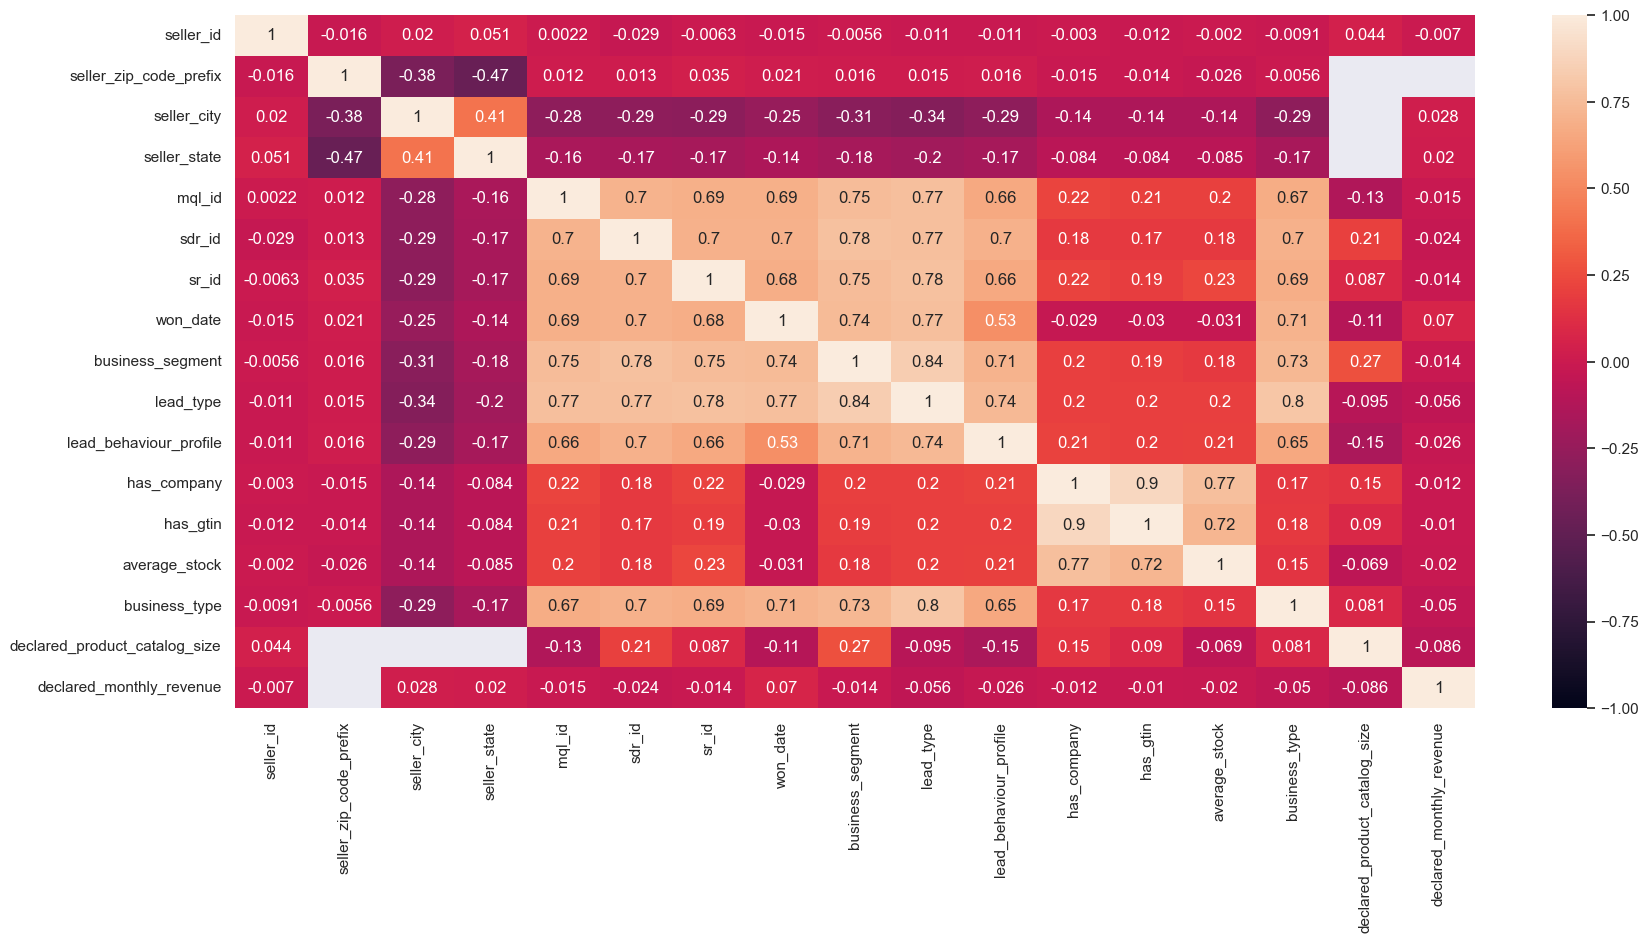

In [186]:
#se crea la matriz de correlacion
corr=seller_id_combinado.corr()

#se grafica con un mapa de calor
sns.set(rc={'figure.figsize':(20,9)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=+1)

<AxesSubplot: >

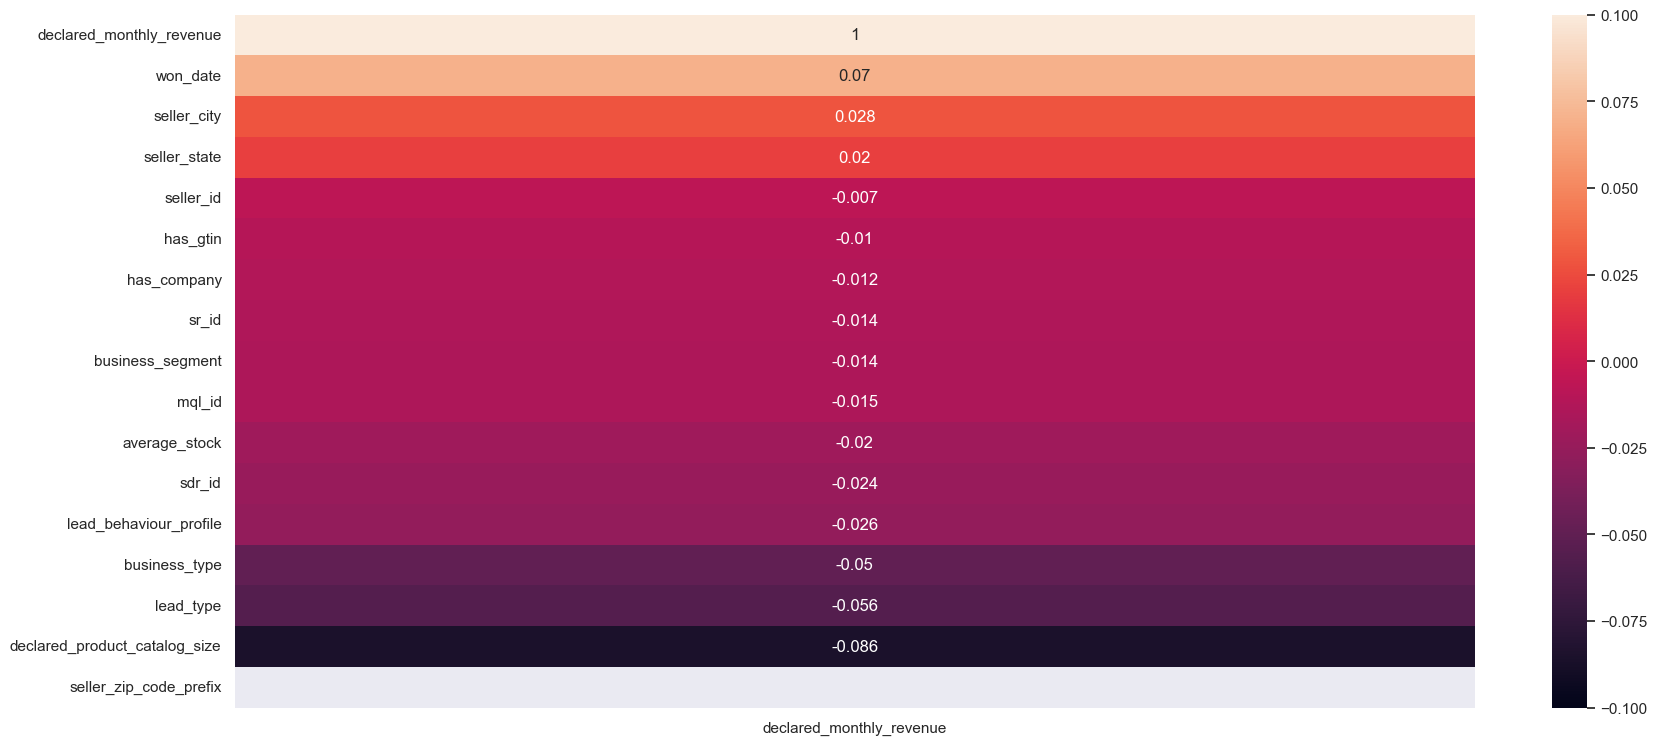

In [188]:
#Se arma otro grafico solo con la columna "declared_monthly_revenue"
corr2=corr.sort_values(by="declared_monthly_revenue",ascending=False)[["declared_monthly_revenue"]]
sns.heatmap(corr2,annot=True,vmin=-0.1,vmax=+0.1)

<h3>Tiempo de entrega producto<h3>

In [176]:
#En la columna orders se puede agregar una nueva columna que contenga la cantidad de dias entre
#la aprobacion de una compra y su entrega al cliente.

Orders['Tiempo_entrega'] = pd.to_datetime(Orders["order_approved_at"]) - pd.to_datetime(Orders['order_delivered_customer_date'])

#Transformar los valores a solo días
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].apply(lambda x: x.days + (x.seconds / 86400)) 

#Cambiar el tipo de datos de la columna a números decimales
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].astype(float) 


print(Orders['Tiempo_entrega'])


0        -8.429144
1       -12.502292
2        -9.382708
3       -13.196331
4        -2.830938
           ...    
99436    -8.218009
99437   -22.185637
99438   -24.847234
99439   -17.080938
99440    -7.075023
Name: Tiempo_entrega, Length: 99441, dtype: float64


<h2>Combinacion de datasets y creacion de matriz de correlacion<h2>

In [177]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Closed_deals,on="seller_id",how="left")

In [178]:
#Lista de columnas a las que se le aplica label encoder
list_columns = datasets_combinados.select_dtypes(include='object').columns


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Se aplica label encoder a todas las columnas
for col in list_columns:
    datasets_combinados[col] = le.fit_transform(datasets_combinados[col])

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_6588\2947586650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=datasets_combinados.drop(["declared_monthly_revenue","declared_product_catalog_size"],axis=1).corr()


<AxesSubplot: >

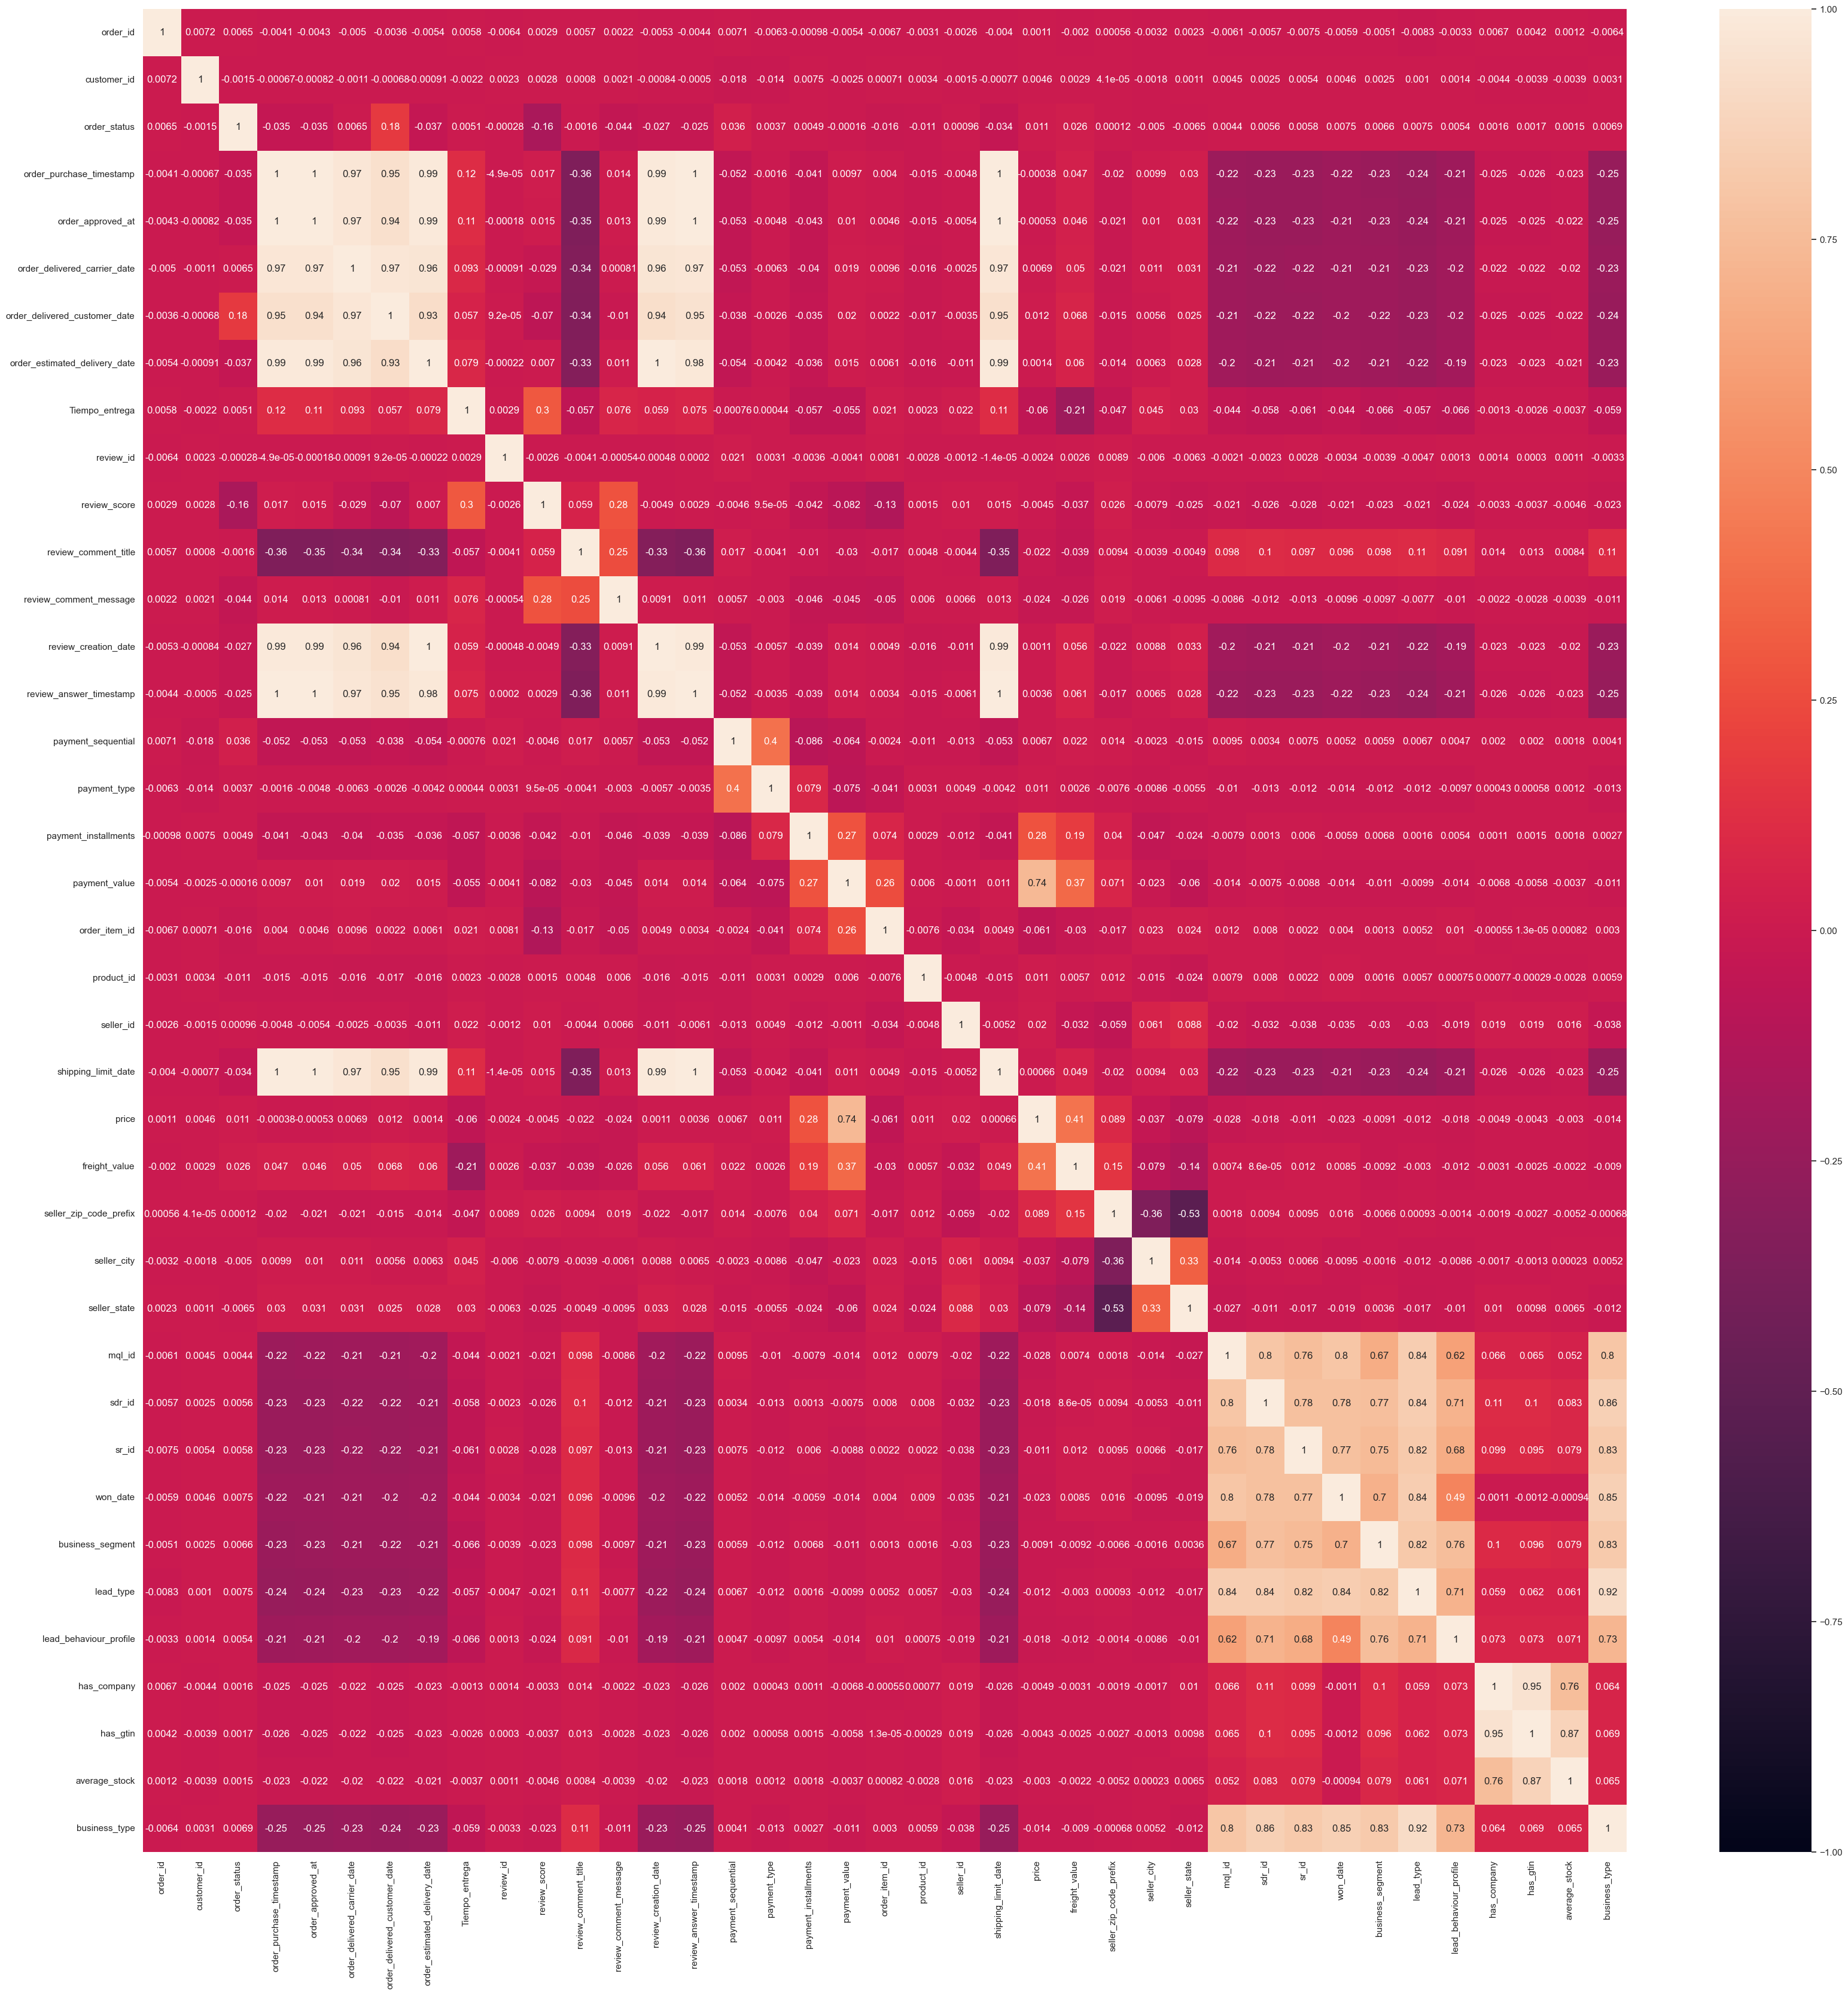

In [190]:
#se crea la matriz de correlacion
corr=datasets_combinados.drop(["declared_monthly_revenue","declared_product_catalog_size"],axis=1).corr()

#se grafica con un mapa de calor
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=+1)

<AxesSubplot: >

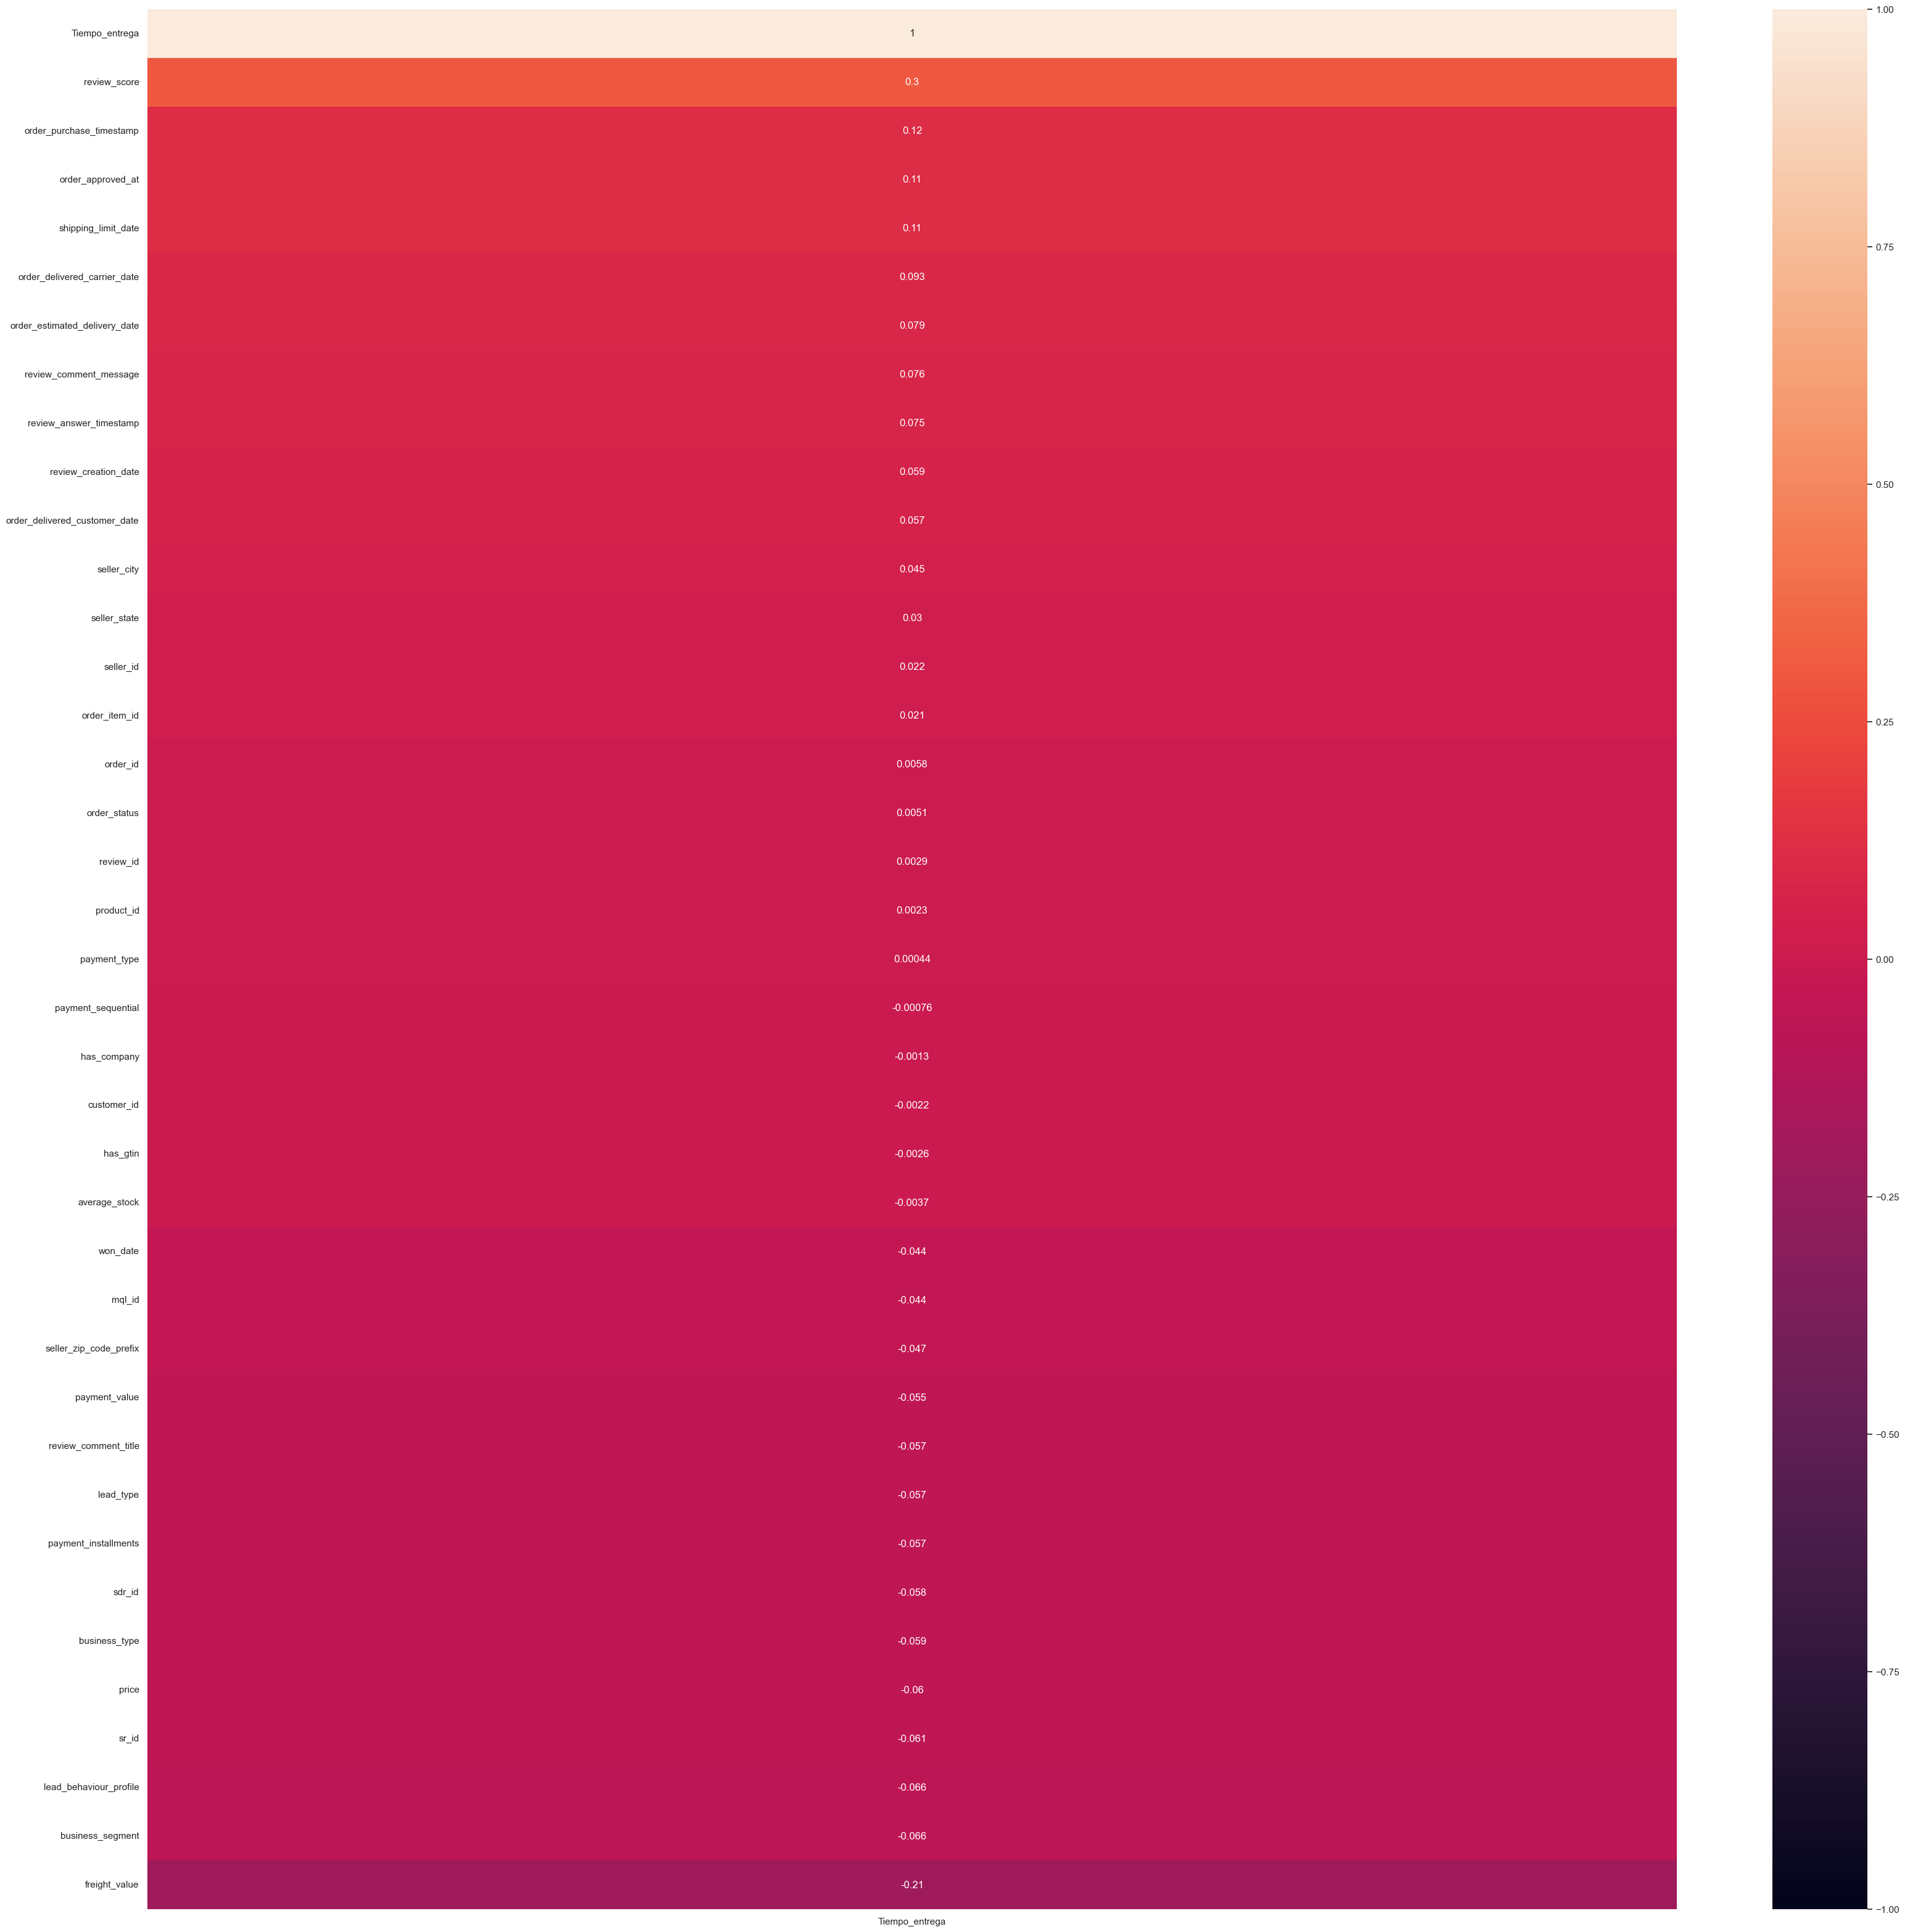

In [191]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="Tiempo_entrega",ascending=False)[["Tiempo_entrega"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)

<AxesSubplot: >

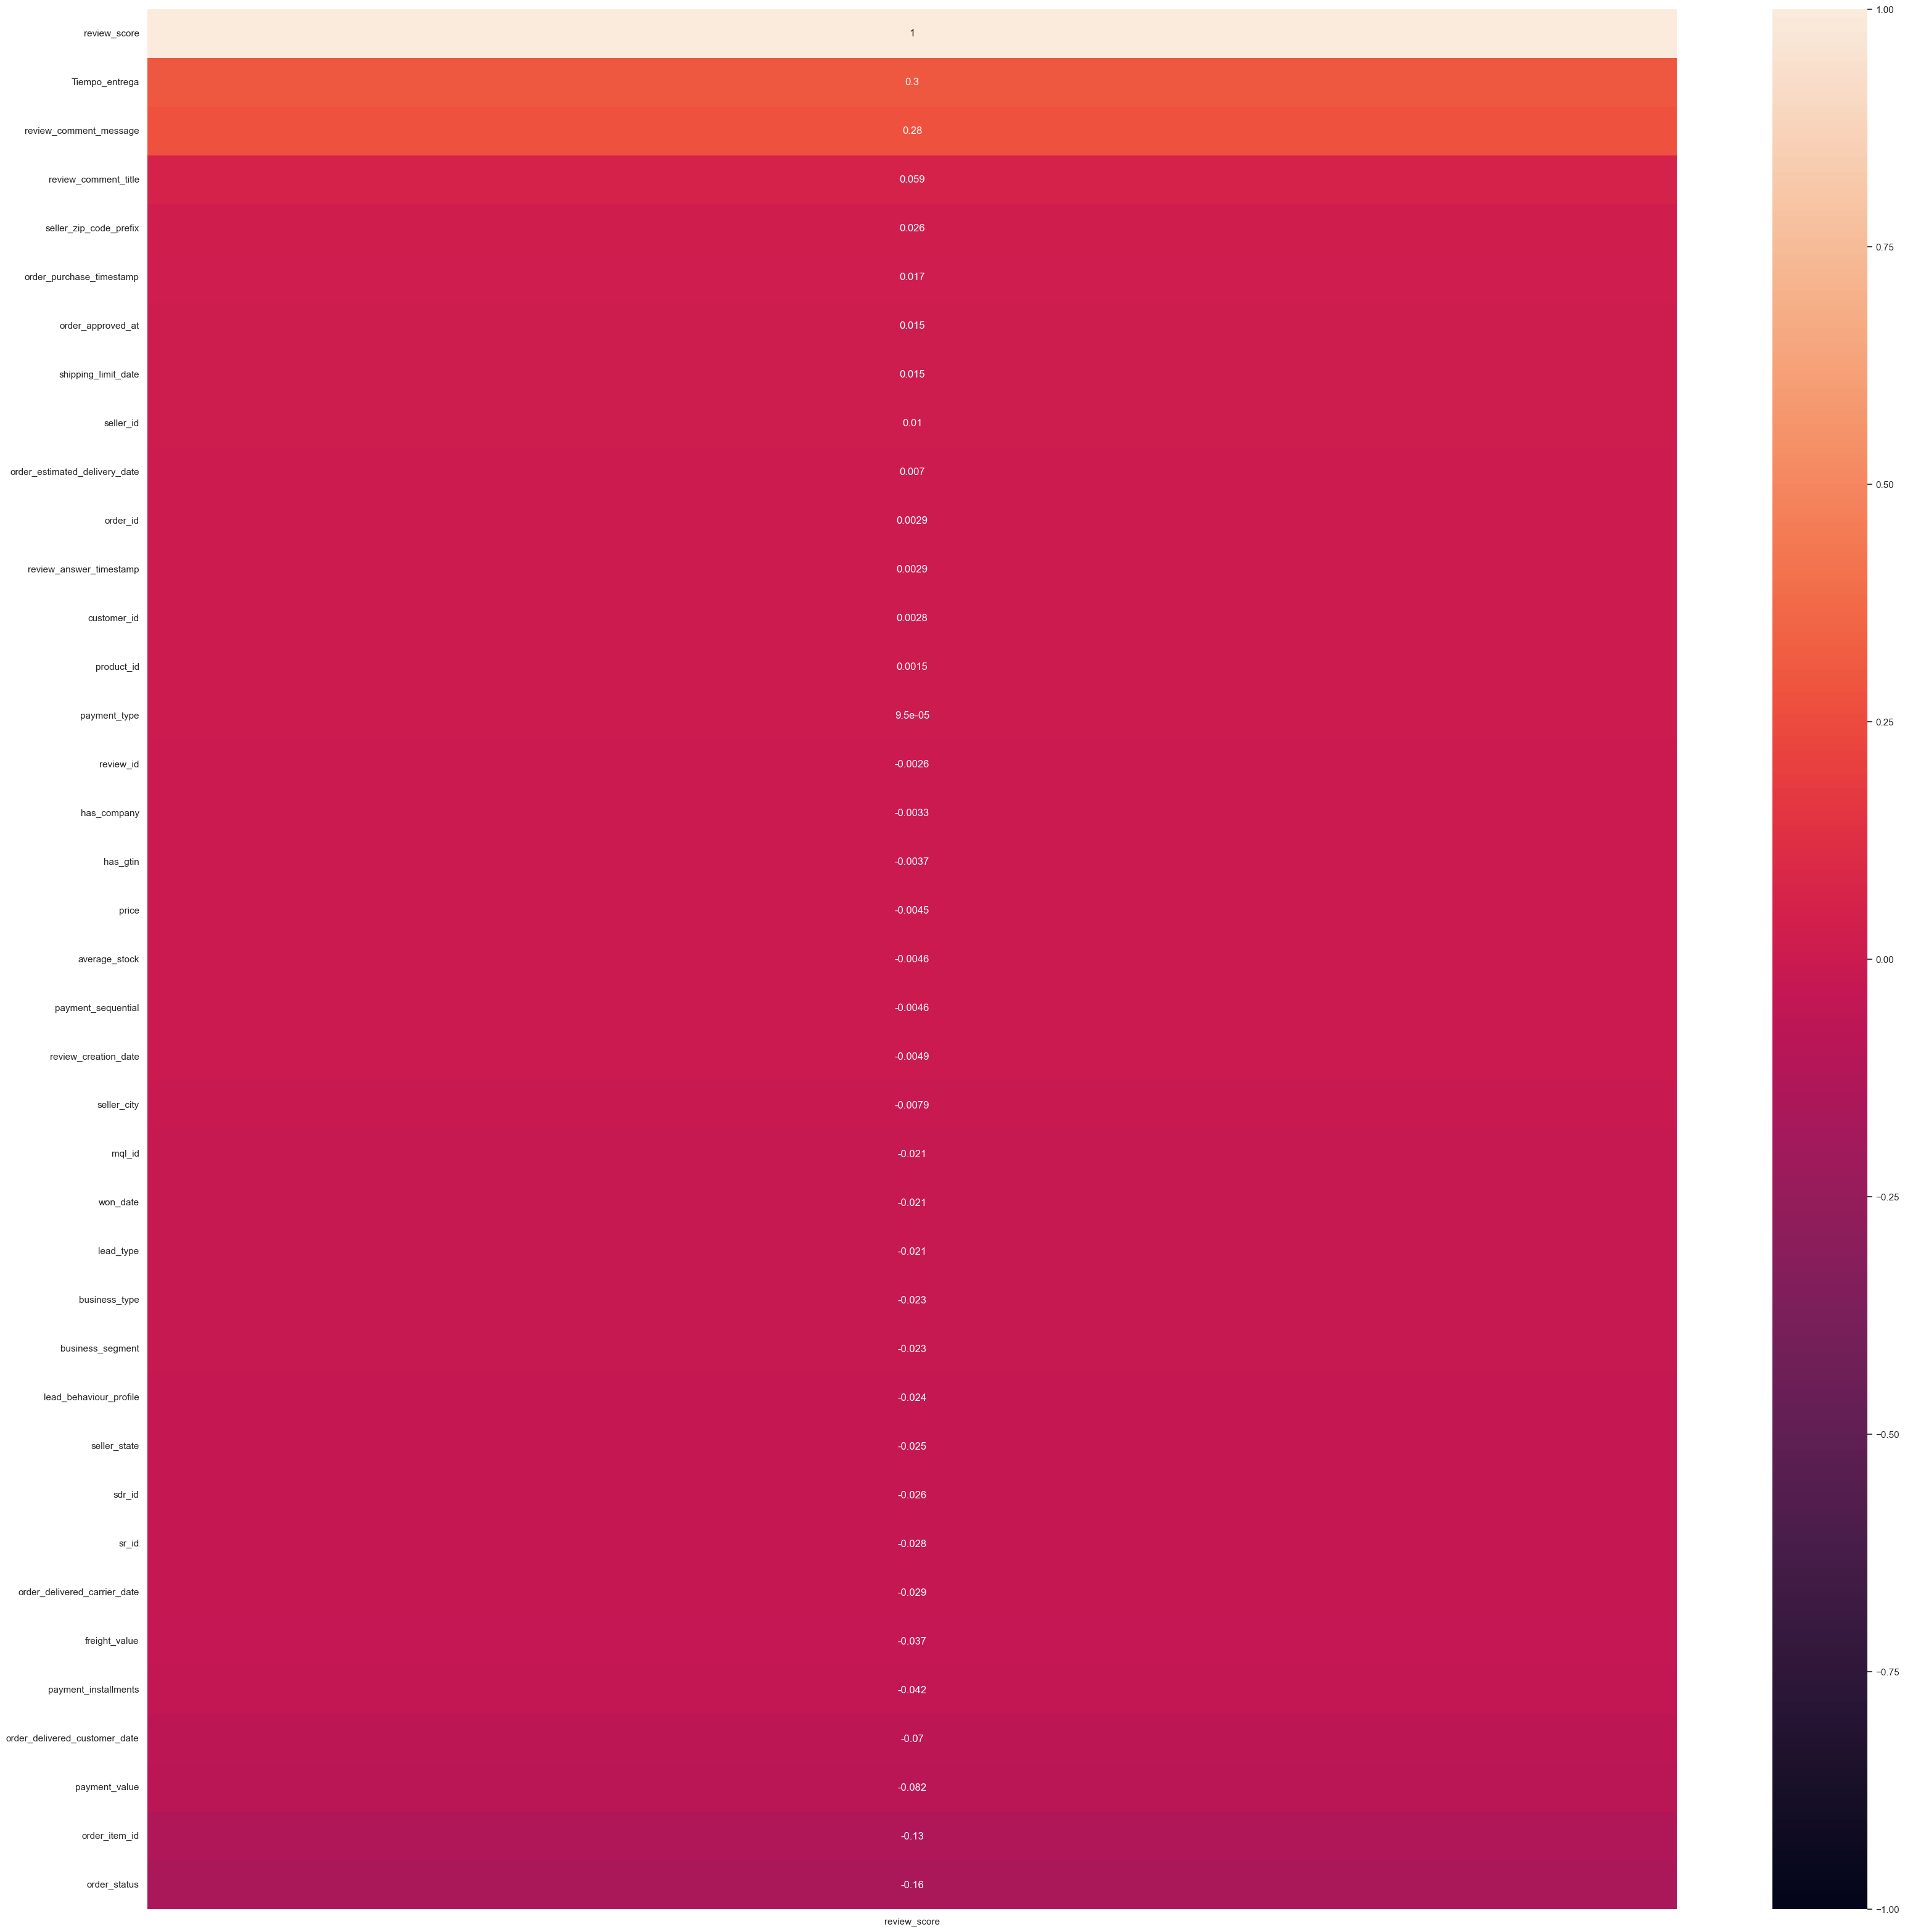

In [192]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="review_score",ascending=False)[["review_score"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)